<a href="https://colab.research.google.com/github/ChrisDaVillager/Data-Science-Salaries/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Christopher Puccetti**

# **Mount & Import**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, silhouette_score
import sklearn.metrics as metrics

# **Dataset 1: Videogame Sales**

1. Source of data
  * https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset 
2. Brief description of data
  * Dataset that includes video games alongside their respective publisher/developer and how well they sold. 
3. What is the target?
  * Target it 'Global_Sales'
4. Is this a classification or regression problem?
  * Regression
5. How many features?
  * 16 total features
6. How many rows of data.
  * 16719 rows
7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
  * Missing values that could skew model predictions and visualization, having to drop columns that have more than half of missing values

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Stack 2/Video_Games_Sales_as_at_22_Dec_2016.csv')
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# **Dataset 2: Data Science Job Salaries**

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Stack 2/ds_salaries.csv')
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


1. Source of data
  * https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
2. Brief description of data
  * Salaries of Data Science careers based on exp level, location and title
3. What is the target?
  * Target is 'salary'
4. Is this a classification or regression problem?
  * Regression
5. How many features?
  * 12 total features
6. How many rows of data.
  * 607 rows
7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
  * Small dataset & binarizing values

In [6]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


#**Project 2 - Part 2**

**To meet the requirements for this week you must have:**

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-clearly commented all of your cleaning steps and described any decisions you made



In [7]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Dropping unnecessary columns**

In [8]:
# removing unnecessary columns
# removing 'salary', 'salary_currency' and 'Unnamed: 0' & 'company_location' as we will focus on salary in USD
df2 = df2.drop(columns=['Unnamed: 0', 'salary', 'salary_currency', 'company_location'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


**Checking duplicate values**

In [9]:
df2.duplicated().sum()

42

**Checking missing values**

In [10]:
df2.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_size          0
dtype: int64

**Checking inconsistencies in data for categorical values**
* No inconsistencies found in data

In [11]:
df2['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

**Produce univariate visuals for the target and all features**

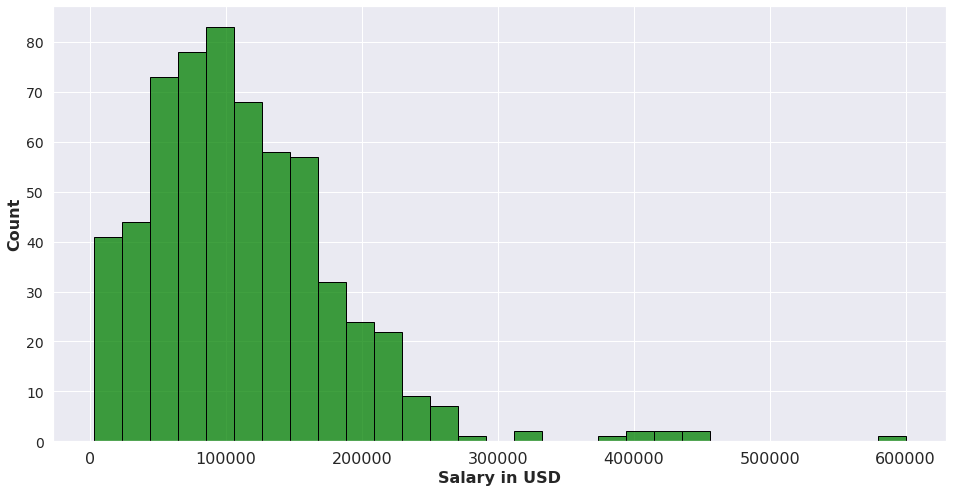

In [12]:
# creating histogram of salaries

sns.set(style = 'darkgrid')
plt.figure(figsize=(16,8))

sns.histplot(data=df2, x='salary_in_usd', color='green', edgecolor='black')
plt.xlabel('Salary in USD', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Count', size=16, weight='semibold')
plt.yticks(size=14)

plt.show();

The above histogram displays the Salaries of Data Science careers in USD. As displayed, most careers average around 100k. There are a few outliers like 400k & 600k. The higher the salary, the more important that role could be.

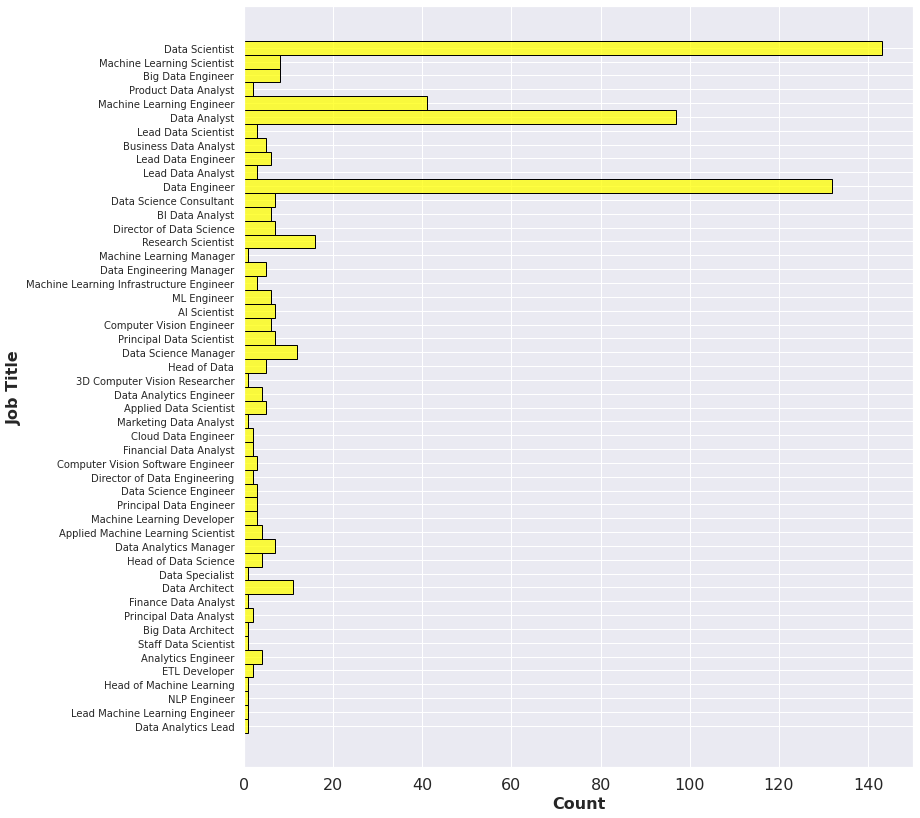

In [13]:
# creating secondary histogram to display location of employees

sns.set(style = 'darkgrid')
plt.figure(figsize=(12,14))

sns.histplot(data=df2, y='job_title', color='yellow', edgecolor='black')
plt.xlabel('Count', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Job Title', size=16, weight='semibold')
plt.yticks(size=10)

plt.show();

Our histogram above is displaying the amount of roles, alongside the amount of employees that sit in the role, in our dataset. We can see a majority of our employees from our dataset sits in the Data Scientist/Engineer role.

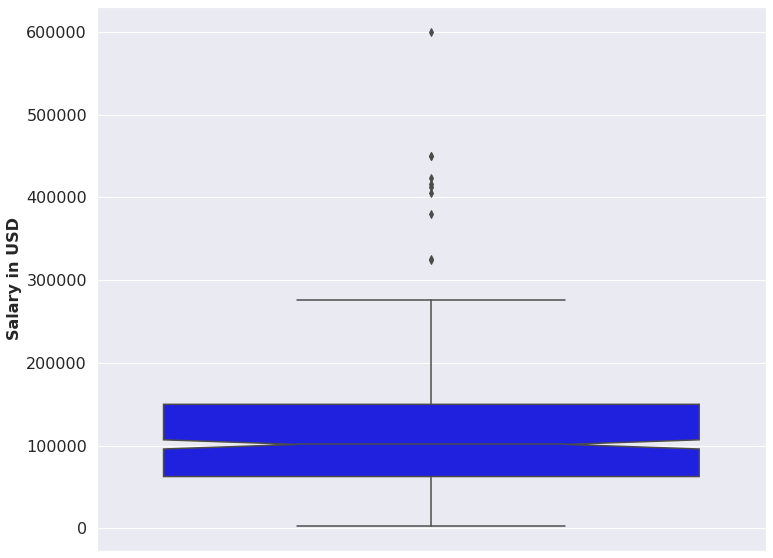

In [14]:
# creating boxplot of salaries

sns.set(style='darkgrid')
plt.figure(figsize = (12,10))

sns.boxplot(data=df2, y='salary_in_usd', notch= True, color='Blue')
plt.ylabel('Salary in USD', size=16, weight='semibold')
plt.yticks(size=16)

plt.show();

The boxplot displays the average salary range for the employees in our dataset. Majority of the provided data is in the range of 80k to 150k. The median salary sits just above 100k. Outliers are easily displayed, in compared to our histogram. 

#**Project 2 - Part 3**

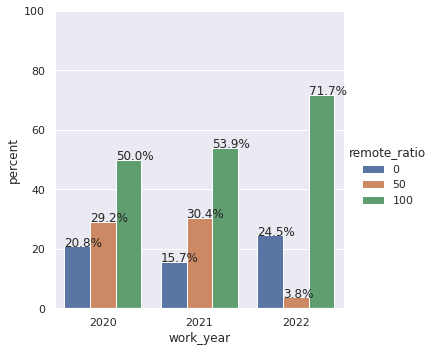

In [15]:
# creating countplot defining x='work_year' and hue='remote_ratio'
# CITING: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# CITING cont: using percentages on top of barplots

sns.set_theme(style='darkgrid')

x,y = 'work_year','remote_ratio'

df3 = df2.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

z = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df3)
z.ax.set_ylim(0,100)

for g in z.ax.patches:
    text = str(g.get_height().round(1)) + '%'
    text_x = g.get_x()
    text_y = g.get_height()
    z.ax.text(text_x, text_y, text)

plt.show();

The above countplot displays the amount of employees that either worked in office, hybrid or remote throughout 2020 to 2022. We can see that remote work increased from '20 to '21 and a huge jump from '21 to '22. Office work did increase over the 2 years and hybrid decreased. Employee's had to have made a decision of which type of work they would rather do. 

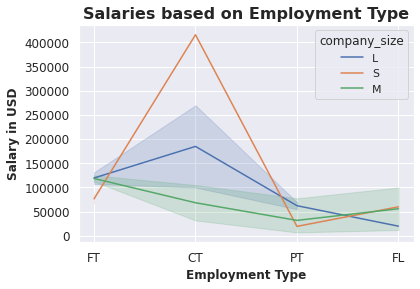

In [16]:
# creating lineplot to display how much employee's make based on their employment type and the size of the company they work for
sns.set_theme(style='darkgrid')
sns.lineplot(data=df2, x='employment_type', y='salary_in_usd', hue='company_size')

plt.title('Salaries based on Employment Type', weight='bold', size=16)
plt.xlabel('Employment Type', weight='semibold')
plt.xticks(size=12)
plt.ylabel('Salary in USD', weight='semibold')
plt.yticks(size=12)

plt.show();

Our lineplot shows the salaries of employee's based on their employment type. Small companies has a very big outlier when it comes to their CT type(contract work). This specific employee must have had a really good contract with a known consumer to land that salary. Both Large and Small companies pay their contract workers more, yet Medium sized companies pay all their non-FullTime employee's less on average. Free lance employee's dont get much of a salary, as do Part Time employees. 

#**Project 2- Part 4**

**Preprocessing Data**

In [17]:
# create copy of df for ML
df_ml = df2.copy()
df_ml.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,L


In [18]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


In [19]:
df_ml['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [20]:
# ordinal encoding exp_level, emp_type & comp_size
exp_replace = {'SE':0, 'MI':1, 'EN':2, 'EX':26}
emp_replace = {'FT':0, 'PT':1, 'CT':2, 'FL':3}
comp_replace = {'L':0, 'M':1, 'S':2}

df_ml['experience_level'].replace(exp_replace, inplace=True)
df_ml['employment_type'].replace(emp_replace, inplace=True)
df_ml['company_size'].replace(comp_replace, inplace=True)
df_ml['company_size']

0      0
1      2
2      1
3      2
4      0
      ..
602    1
603    1
604    1
605    1
606    0
Name: company_size, Length: 607, dtype: int64

In [21]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    int64 
 2   employment_type     607 non-null    int64 
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 38.1+ KB


In [22]:
# defining features & target
X = df_ml.drop('salary_in_usd', axis=1)
y = df_ml['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# create categorical selector
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['job_title', 'employee_residence']

In [24]:
# dataframe of categorical columns
train_data = X_train[cat_selector(X_train)]
test_data = X_test[cat_selector(X_test)]
train_data

,job_title,employee_residence
544,Data Engineer,US
361,Data Analyst,CA
335,Data Engineer,US
296,Data Analyst,US
245,Data Engineer,GB
...,...,...
71,Data Scientist,FR
106,Research Scientist,CA
270,Data Engineer,US
435,Data Engineer,GB


In [25]:
# instantiate ohe & fit onto training data
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(train_data)

# transform both data sets
train_ohe = ohe.transform(train_data)
test_ohe = ohe.transform(test_data)
train_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# convert from array to dataframe
ohe_column = ohe.get_feature_names_out(train_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column)
train_ohe

,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,...,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_TN,employee_residence_TR,employee_residence_US,employee_residence_VN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# concatenate ohe with numerical features
num_selector = make_column_selector(dtype_include='number')

train_num = X_train[num_selector(X_train)].reset_index(drop=True)
test_num = X_test[num_selector(X_test)].reset_index(drop=True)

X_train_processed = pd.concat([train_num, train_ohe], axis=1)
X_test_processed = pd.concat([test_num, test_ohe], axis=1)
X_train_processed.describe()

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,...,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_TN,employee_residence_TR,employee_residence_US,employee_residence_VN
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2021.424176,1.837363,0.048352,70.659341,0.813187,0.010989,0.006593,0.008791,0.006593,0.006593,...,0.008791,0.002198,0.010989,0.002198,0.008791,0.004396,0.002198,0.002198,0.558242,0.002198
std,0.697911,5.368772,0.300280,41.204395,0.655577,0.104366,0.081021,0.093451,0.081021,0.081021,...,0.093451,0.046881,0.104366,0.046881,0.093451,0.066226,0.046881,0.046881,0.497143,0.046881
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,1.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2022.000000,1.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2022.000000,26.000000,3.000000,100.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
scaler = StandardScaler()
scaler.fit(X_train_processed)
X_train = scaler.transform(X_train_processed)
X_test = scaler.transform(X_test_processed)

**Using Random Forest Model**

In [81]:
# instantiate RF
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
# predict model
rf.predict(X_test)

array([141300.0027831 , 141300.0027831 , 142674.39285714, 146679.6031746 ,
        55496.23516667, 135728.45      ,  40413.11      ,  39148.53      ,
        68341.15263095,  32384.08      ,  42807.56      , 141300.0027831 ,
       141300.0027831 ,  58650.8       , 146943.2       , 141300.0027831 ,
        68306.11      , 135512.5974026 ,  22521.42      , 137746.78362319,
        96072.84095238, 147803.035     , 141300.0027831 , 134597.79365079,
        61530.61      ,  60155.46      , 127088.08464286, 109042.60444444,
       114052.42953633,  86114.29902164,  64203.779     , 114052.42953633,
        95685.59      ,  36358.20780556,  59684.72      , 114052.42953633,
       140960.16666667,  88270.87761905,  49059.49333333, 108930.13781746,
       169670.82219698, 169670.82219698,  89767.5       ,  79972.70333333,
       114052.42953633,  54069.17      ,  55355.11016667, 135512.5974026 ,
       105573.5831746 , 161456.46026087, 114052.42953633,  40077.075     ,
        79474.25595238, 1

In [83]:
# evaluate model
# high train score, low test score
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f'Training Score: {rf_train_score}')
print(f'Testing Score: {rf_test_score}')

Training Score: 0.8315891318687694
Testing Score: 0.4532943483802597


In [84]:
# set max_depth to 6 for another evaluation
rf_6 = RandomForestRegressor(max_depth=6, random_state=42)
rf_6.fit(X_train, y_train)
rf_6_train_score = rf_6.score(X_train, y_train)
rf_6_test_score = rf_6.score(X_test, y_test)
print(f'Training Score: {rf_6_train_score}')
print(f'Testing Score: {rf_6_test_score}')

Training Score: 0.7087931884320031
Testing Score: 0.4717159748160673


**Tuning RF Model max_depth**

In [85]:
# find max depth
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

39

In [86]:
# creating df display scores
depths = range(1, max(est_depth))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
    scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)

scores.head()

,Test Score,Train Score
1,0.396536,0.309401
2,0.400678,0.432050
3,0.44048,0.538310
4,0.448037,0.608403
5,0.462358,0.666789


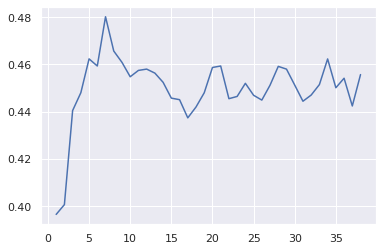

In [87]:
# plot scores
plt.plot(scores['Test Score']);

In [88]:
# sorting scores by best test scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
7,0.480182,0.745478
8,0.465672,0.766593
5,0.462358,0.666789
34,0.462326,0.825617
9,0.460883,0.780363


In [94]:
# evaluating using best max_depth
rf_7 = RandomForestRegressor(max_depth=7, random_state=42)
rf_7.fit(X_train, y_train)
rf_7_train_score = rf_7.score(X_train, y_train)
rf_7_test_score = rf_7.score(X_test, y_test)
print(f'Training Score: {rf_7_train_score}')
print(f'Testing Score: {rf_7_test_score}')

Training Score: 0.7434580992241269
Testing Score: 0.47484582908373185


**Tuning RF Model n_estimators**

In [90]:
# creating list of values for n_estimators
# using max_depth of 7
n_est = [10, 100, 150, 200, 250, 300]
scores2 = pd.DataFrame(index=n_est, columns=['Test Score', 'Train Score'])
for n in n_est:
    model = RandomForestRegressor(max_depth=7, n_estimators=n)
    model.fit(X_train, y_train)
    scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
    scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)

scores2.head()

,Test Score,Train Score
10,0.457668,0.735518
100,0.448571,0.740202
150,0.45351,0.743641
200,0.455414,0.739865
250,0.461366,0.744089


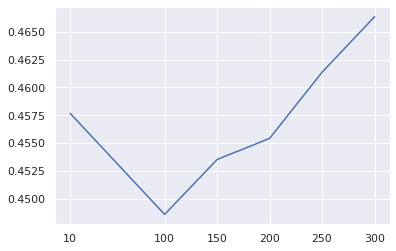

In [93]:
# plot scores
plt.plot(scores2['Test Score'])
plt.xticks(n_est);

In [92]:
# sort scores by best test scores
scores2_sorted = scores2.sort_values(by='Test Score', ascending=False)
scores2_sorted.head()

,Test Score,Train Score
300,0.466362,0.745102
250,0.461366,0.744089
10,0.457668,0.735518
200,0.455414,0.739865
150,0.45351,0.743641


**Using KNN Model**

In [95]:
# creating evaluation model function
def eval_model(model,X_test,y_test):

    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred, average='micro')
    recall = metrics.recall_score(y_test,y_pred, average='micro')

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

In [96]:
# instantiate scaler & pca > pipeline
# will use 90% variance
# transform data to check features after PCA app.
scaler = StandardScaler()
pca = PCA(n_components=35)
preprocessor_pca = make_pipeline(scaler, pca)

print('Shape prior PCA:', X_train.shape)
print('Shape after PCA:', preprocessor_pca.fit_transform(X_train).shape)
print('Columns Reduced by:', X_train.shape[1] - preprocessor_pca.fit_transform(X_train).shape[1])

Shape prior PCA: (455, 98)
Shape after PCA: (455, 35)
Columns Reduced by: 63


In [97]:
# instantiate KNN
knn = KNeighborsClassifier()

**With PCA**

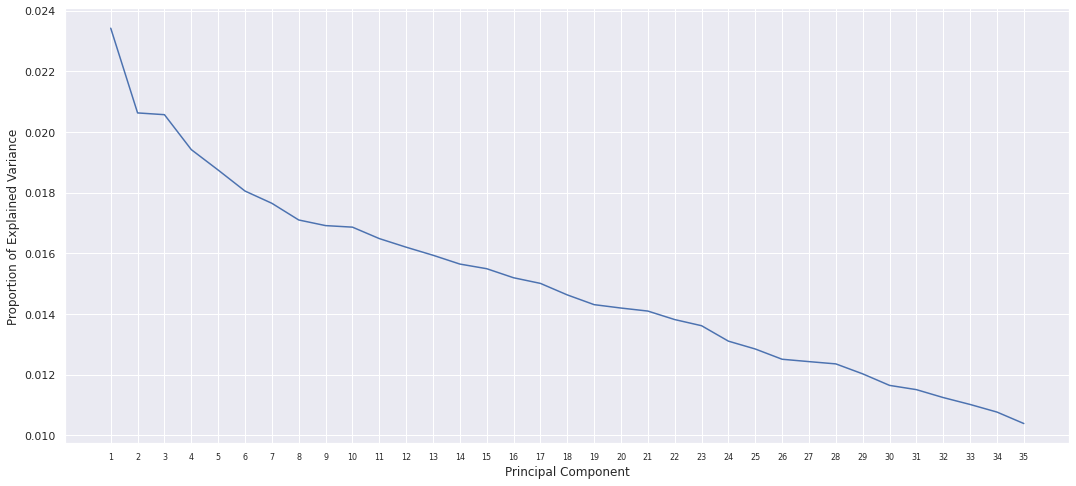

In [98]:
# Plot the explained variance ratios of the first 30 principal components
plt.figure(figsize=(18,8))
plt.plot(range(1, 36), pca.explained_variance_ratio_)
plt.xticks(ticks = range(1, 36), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [99]:
pca35 = PCA(n_components=35)

In [100]:
%%time
# using PCA 
knn_pca = make_pipeline(scaler, pca35, knn)
knn_pca.fit(X_train, y_train)

pred_pca = knn_pca.predict(X_test)
pred_pca

CPU times: user 27.7 ms, sys: 11.2 ms, total: 38.9 ms
Wall time: 35.9 ms


array([ 80000,  80000,  35735,  15966,  93150, 225000,  36643,  36643,
        43966,  36643,  36643,  80000,  80000, 150000, 151000,  80000,
        37825, 200000,  18442, 105400,   5882,  12000,  80000,  58000,
         5882,  15966,  70500,  58000,  84900,  58894,  63810,  84900,
        61300,  12901,  36643,  84900,  78000,  61300,   5679,  39263,
       210000, 210000,  52396,  81000,  84900,  20000,  21669, 200000,
        37300, 123000,  84900,  33511,  63900,  84900,  80000,  84900,
       105400, 130026,  20000,  21844, 225000,  35735,   5679, 105000,
       200000,  63900,  24823,  45807,  61300,  56256,  37825, 140400,
         6072,  50000,  52396,  15966,  93150, 200000,  58000,  36643,
       200000,  80000,  50000,  20000, 175000,  21637,  81000, 154600,
        58000,  24823,  58000,  24823,  78000,  90000,  70500,  12000,
        63810,  43966,   9466,  80000,  38776,  47899, 105400, 110000,
        84900,  50000,  84900, 147800,  84900,  49268,  45807,  20171,
      

In [102]:
eval_pca = eval_model(knn_pca, X_test, y_test)

print('Accuracy:', eval_pca['Accuracy'])
print('Precision:', eval_pca['Precision'])
print('Recall:', eval_pca['Recall'])

Accuracy: 0.019736842105263157
Precision: 0.019736842105263157
Recall: 0.019736842105263157


**Without PCA**

In [103]:
%%time
# no PCA
no_pca = make_pipeline(scaler, knn)
no_pca.fit(X_train, y_train)

pred_no_pca = no_pca.predict(X_test)
pred_no_pca

CPU times: user 15.2 ms, sys: 1.94 ms, total: 17.2 ms
Wall time: 15.1 ms


array([155000, 155000,  55000,  15966,  93150, 225000,  36643,  36643,
        43966,  36643,  36643, 155000, 155000, 150000, 151000, 155000,
        61467, 200000,  18442, 105400,   5882, 225000, 155000,  58000,
         5882,  15966,  70500,  58000,  90320,  58894,  63810,  90320,
        52396,  18907,  39916,  90320,  78000,  61300,   5679,  39263,
       104890, 104890,  52396, 120000,  90320, 120000,  10354, 200000,
       189650, 165000,  90320,  33511,  63900,  90320, 155000,  90320,
       105400,  90734,  50000,  81000, 225000,  55000,  18442, 105000,
       200000,  63900,  24823,  39263,  61300,  56256,  37825, 120000,
        40570,  50000,  52396,  15966,  65000, 200000,  58000,  36643,
       200000, 115000,  50000,  20000, 175000,  28399,  81000, 154600,
        58000,  24823,  58000,  24823,  78000, 200000,  70500,  12000,
        63810,  43966,   9466, 155000,  38776,  47899, 105400, 110000,
        90320,  50000,  90320, 147800,  90320,  49268,  45807,  20171,
      

In [104]:
eval_pca = eval_model(no_pca, X_test, y_test)

print('Accuracy:', eval_pca['Accuracy'])
print('Precision:', eval_pca['Precision'])
print('Recall:', eval_pca['Recall'])

Accuracy: 0.02631578947368421
Precision: 0.02631578947368421
Recall: 0.02631578947368421
